# importing dependencies

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import xgboost as xgb
import joblib

%matplotlib inline


# Loading the Data

In [31]:
dataset = pd.read_csv('CO2_Emissions_Canada.csv')
df = dataset[['Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]

# Data Preprocessing

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Transmission                      7385 non-null   object 
 3   Fuel Type                         7385 non-null   object 
 4   Fuel Consumption City (L/100 km)  7385 non-null   float64
 5   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 6   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 519.4+ KB


In [33]:
df = pd.get_dummies(df, columns=['Fuel Type'], drop_first=True)

In [34]:
df['Gears'] = df['Transmission'].str.extract(r'(\d+)').astype(float)
df['Transmission Type'] = df['Transmission'].str.extract(r'([A-Za-z]+)')
df = pd.get_dummies(df, columns=['Transmission Type'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7385 non-null   float64
 1   Cylinders                         7385 non-null   int64  
 2   Transmission                      7385 non-null   object 
 3   Fuel Consumption City (L/100 km)  7385 non-null   float64
 4   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 5   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 6   Fuel Consumption Comb (mpg)       7385 non-null   int64  
 7   CO2 Emissions(g/km)               7385 non-null   int64  
 8   Fuel Type_E                       7385 non-null   bool   
 9   Fuel Type_N                       7385 non-null   bool   
 10  Fuel Type_X                       7385 non-null   bool   
 11  Fuel Type_Z                       7385 non-null   bool   
 12  Gears 

In [35]:
df['Gears'].isnull().sum()
df.dropna(subset=['Gears'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7090 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7090 non-null   float64
 1   Cylinders                         7090 non-null   int64  
 2   Transmission                      7090 non-null   object 
 3   Fuel Consumption City (L/100 km)  7090 non-null   float64
 4   Fuel Consumption Hwy (L/100 km)   7090 non-null   float64
 5   Fuel Consumption Comb (L/100 km)  7090 non-null   float64
 6   Fuel Consumption Comb (mpg)       7090 non-null   int64  
 7   CO2 Emissions(g/km)               7090 non-null   int64  
 8   Fuel Type_E                       7090 non-null   bool   
 9   Fuel Type_N                       7090 non-null   bool   
 10  Fuel Type_X                       7090 non-null   bool   
 11  Fuel Type_Z                       7090 non-null   bool   
 12  Gears      

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7090 entries, 0 to 7384
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7090 non-null   float64
 1   Cylinders                         7090 non-null   int64  
 2   Transmission                      7090 non-null   object 
 3   Fuel Consumption City (L/100 km)  7090 non-null   float64
 4   Fuel Consumption Hwy (L/100 km)   7090 non-null   float64
 5   Fuel Consumption Comb (L/100 km)  7090 non-null   float64
 6   Fuel Consumption Comb (mpg)       7090 non-null   int64  
 7   CO2 Emissions(g/km)               7090 non-null   int64  
 8   Fuel Type_E                       7090 non-null   bool   
 9   Fuel Type_N                       7090 non-null   bool   
 10  Fuel Type_X                       7090 non-null   bool   
 11  Fuel Type_Z                       7090 non-null   bool   
 12  Gears      

In [37]:
df.drop(columns=['Transmission'], inplace=True)

# Checking the correlation

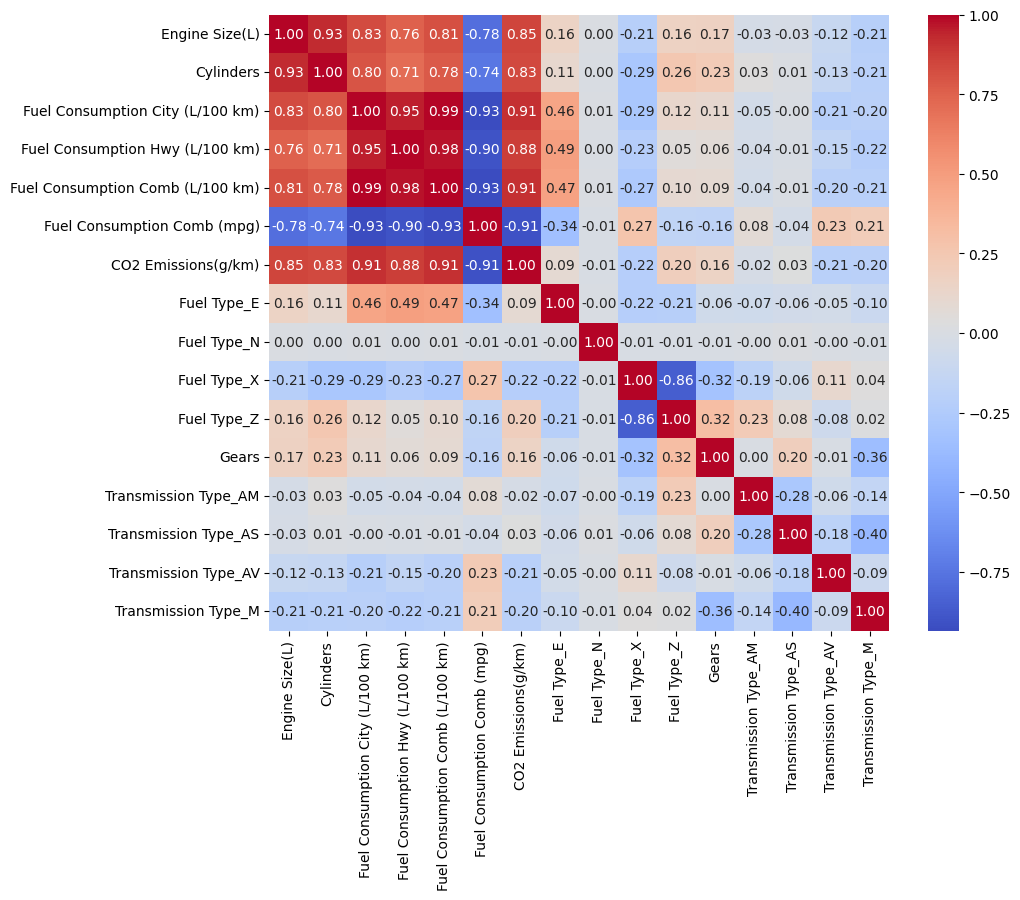

In [38]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [39]:
# Find correlations with target variable
correlation_with_target = corr_matrix["CO2 Emissions(g/km)"].sort_values(ascending=False)
print(correlation_with_target)


CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.912219
Fuel Consumption Comb (L/100 km)    0.911002
Fuel Consumption Hwy (L/100 km)     0.877106
Engine Size(L)                      0.853440
Cylinders                           0.834884
Fuel Type_Z                         0.196335
Gears                               0.159302
Fuel Type_E                         0.087834
Transmission Type_AS                0.025119
Fuel Type_N                        -0.008509
Transmission Type_AM               -0.022556
Transmission Type_M                -0.200171
Transmission Type_AV               -0.208236
Fuel Type_X                        -0.220511
Fuel Consumption Comb (mpg)        -0.907894
Name: CO2 Emissions(g/km), dtype: float64


In [40]:
# dropping Fuel Consumption City and Fuel Consumption Hwy because of their identical correlation
# dropping Fuel Consumption Comb(mpg) because it has a high negative corr as per Fuel Consumption Comb(L/100km)

df.drop(columns=['Fuel Consumption City (L/100 km)', 
                 'Fuel Consumption Hwy (L/100 km)', 
                 'Fuel Consumption Comb (mpg)', 
                 'Transmission Type_AM', 
                 'Transmission Type_AS'], inplace=True)

In [41]:
# Find correlations with target variable
correlation_with_target = corr_matrix["CO2 Emissions(g/km)"].sort_values(ascending=False)
print(correlation_with_target)

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.912219
Fuel Consumption Comb (L/100 km)    0.911002
Fuel Consumption Hwy (L/100 km)     0.877106
Engine Size(L)                      0.853440
Cylinders                           0.834884
Fuel Type_Z                         0.196335
Gears                               0.159302
Fuel Type_E                         0.087834
Transmission Type_AS                0.025119
Fuel Type_N                        -0.008509
Transmission Type_AM               -0.022556
Transmission Type_M                -0.200171
Transmission Type_AV               -0.208236
Fuel Type_X                        -0.220511
Fuel Consumption Comb (mpg)        -0.907894
Name: CO2 Emissions(g/km), dtype: float64


In [42]:
# Separate target variable
target = df["CO2 Emissions(g/km)"]

# Normalizing the Features (Helpful in Regression Models)

In [43]:
features = df.drop(columns=["CO2 Emissions(g/km)"]).reset_index(drop=True)  # Ensure index alignment
target = df["CO2 Emissions(g/km)"].reset_index(drop=True)  # Reset index

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Only scale features

df_standardized = pd.DataFrame(features_scaled, columns=features.columns)

# Reattach the unchanged target variable
df_standardized["CO2 Emissions(g/km)"] = target


In [44]:
# Check number of rows and columns before and after
print(f"Original shape: {df.shape}, Standardized shape: {df_standardized.shape}")

Original shape: (7090, 11), Standardized shape: (7090, 11)


In [45]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    7090 non-null   float64
 1   Cylinders                         7090 non-null   float64
 2   Fuel Consumption Comb (L/100 km)  7090 non-null   float64
 3   Fuel Type_E                       7090 non-null   float64
 4   Fuel Type_N                       7090 non-null   float64
 5   Fuel Type_X                       7090 non-null   float64
 6   Fuel Type_Z                       7090 non-null   float64
 7   Gears                             7090 non-null   float64
 8   Transmission Type_AV              7090 non-null   float64
 9   Transmission Type_M               7090 non-null   float64
 10  CO2 Emissions(g/km)               7090 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 609.4 KB


# Splitting Training and Testing Data

In [46]:
X = df_standardized.drop(columns=["CO2 Emissions(g/km)"])
y = df_standardized["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5672, 10) (1418, 10) (5672,) (1418,)


# Model Training

In [47]:
# Initialize models
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# Train models
lin_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)


# Testing the model and evaluation of performance

In [48]:

# Evaluation
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Linear Regression -> MSE: {mse_lin:.4f}, R²: {r2_lin:.4f}")
print(f"Ridge Regression -> MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")
print(f"Lasso Regression -> MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

Linear Regression -> MSE: 39.7142, R²: 0.9882
Ridge Regression -> MSE: 39.6727, R²: 0.9883
Lasso Regression -> MSE: 61.4233, R²: 0.9818


# using XGBoost to check if it provides better 

In [49]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression -> MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost Regression -> MSE: 17.3273, R²: 0.9949


In [50]:
# We will go with XGBoost as it got the best performance

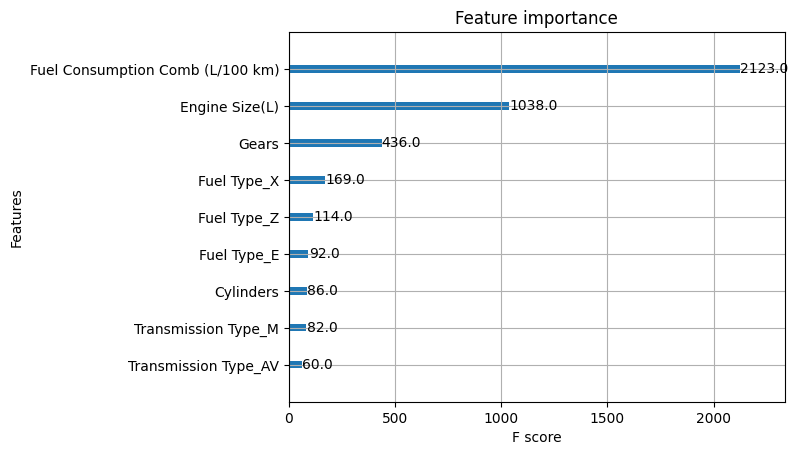

In [51]:
# Get feature importance
xgb_model.get_booster().feature_names = X_train.columns.tolist()
xgb.plot_importance(xgb_model)
plt.show()


#  Dropping less important features to reduce unnecessary features

In [52]:
# Dropping less important features
features_to_drop = ['Fuel Type_E', 'Cylinders', 'Transmission Type_M', 'Transmission Type_AV']
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)


# Calculating mean and standard deviation for further use in app.py

In [53]:
# Suppose these are the final selected features
selected_features = ["Engine Size(L)", "Fuel Consumption Comb (L/100 km)", "Fuel Type_N", "Fuel Type_X", "Fuel Type_Z", "Gears"]

# Extract only the relevant mean & std values
selected_indices = [list(df.columns).index(feat) for feat in selected_features]

# Save only required mean & std values
scaler_values = {
    "mean": scaler.mean_[selected_indices],
    "std": scaler.scale_[selected_indices],
    "features": selected_features  # Save feature names for reference
}

# Save to a file
np.save("scaler_values.npy", scaler_values)


In [54]:
# Train XGBoost with reduced features
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_reduced, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [55]:
# Predictions
y_pred_xgb_reduced = xgb_model.predict(X_test_reduced)
y_pred_xgb_reduced

array([285.09097, 234.8003 , 218.48352, ..., 284.91077, 268.4348 ,
       219.47258], dtype=float32)

In [56]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_xgb_reduced = mean_squared_error(y_test, y_pred_xgb_reduced)
r2_xgb_reduced = r2_score(y_test, y_pred_xgb_reduced)

print(f"XGBoost with Reduced Features -> MSE: {mse_xgb_reduced:.4f}, R²: {r2_xgb_reduced:.4f}")

XGBoost with Reduced Features -> MSE: 20.6251, R²: 0.9939


# Saving the model 

In [57]:

joblib.dump(xgb_model, "co2_emission_model.pkl")
print("Model saved successfully!")

Model saved successfully!
